In [63]:
# Importing libraries for EDA and machine learning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE 

In [52]:
try:
    from imblearn.over_sampling import SMOTE
    print("SMOTE loaded successfully!")
except ModuleNotFoundError:
    print("SMOTE module not found.")

SMOTE loaded successfully!


In [53]:
data = pd.read_csv('bank1.csv' , sep=';')

data.to_csv("bank1-converted.csv", index=False)
print(data.head())


# Kontrollera för saknade värden
print(data.isnull().sum())


# EDA - grundläggande statistik
print(data.describe())

data.columns = data.columns.str.strip()  # Tar bort extra mellanslag från kolumnnamn

print(data.dtypes)





   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan  

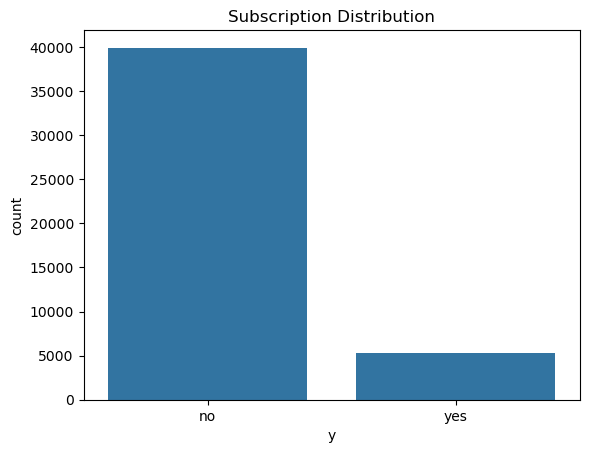

In [54]:
sns.countplot(x='y', data=data)
plt.title('Subscription Distribution')
plt.show()

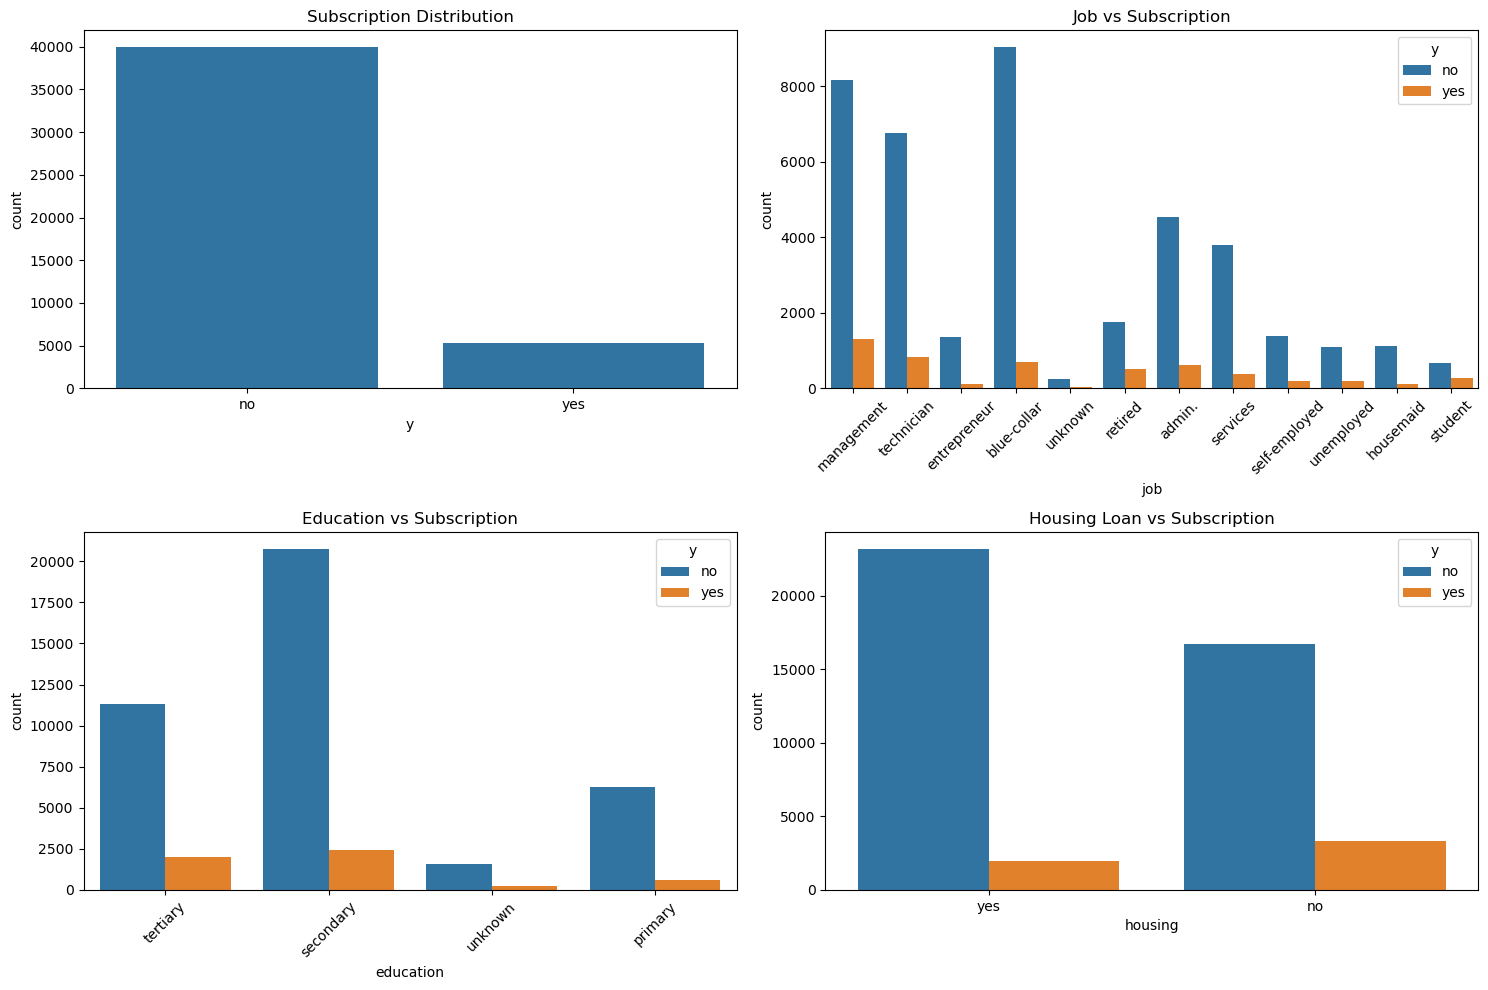

In [55]:
# Visualizing categorical features
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='y', data=data)
plt.title('Subscription Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='job', hue='y', data=data)
plt.title('Job vs Subscription')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(x='education', hue='y', data=data)
plt.title('Education vs Subscription')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x='housing', hue='y', data=data)
plt.title('Housing Loan vs Subscription')
plt.tight_layout()
plt.show()

Fördelning av målvariabeln (Subscription):

Det finns fler kunder som inte prenumererar ('no') än de som gör det ('yes'). Detta indikerar en viss obalans i datan som kan påverka modellens prestanda. Vi kanske behöver överväga tekniker som undersampling eller oversampling vid modellering.
Jobb och prenumeration:

Kunder med yrken som "admin." och "technician" är de mest förekommande. Yrken som "entrepreneur" och "blue-collar" verkar ha en lägre andel prenumerationer, medan vissa yrkesgrupper som "management" och "retired" har högre andel prenumerationer.
Utbildning och prenumeration:

Kunder med en universitetsutbildning har en något högre benägenhet att prenumerera, medan de med en grundläggande utbildning har en lägre sannolikhet.
Bostadslån och prenumeration:

De som har ett bostadslån är mindre benägna att prenumerera jämfört med de som inte har det. Detta kan vara ett tecken på att ekonomisk belastning påverkar deras beslut.

In [56]:
# Data Preprocessing
# Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separating features and target
X = data_encoded.drop('y_yes', axis=1)  # Assuming 'y_yes' is the encoded target column
y = data_encoded['y_yes']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [58]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test_scaled)

# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluating models
print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg))

print("\nKNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))



Logistic Regression:
Accuracy: 0.8438571270596041
              precision    recall  f1-score   support

       False       0.97      0.85      0.91      7952
        True       0.42      0.82      0.56      1091

    accuracy                           0.84      9043
   macro avg       0.70      0.83      0.73      9043
weighted avg       0.91      0.84      0.86      9043


KNN:
Accuracy: 0.8354528364480814
              precision    recall  f1-score   support

       False       0.96      0.85      0.90      7952
        True       0.40      0.71      0.51      1091

    accuracy                           0.84      9043
   macro avg       0.68      0.78      0.71      9043
weighted avg       0.89      0.84      0.85      9043



Noggrannhet (Accuracy): Båda modellerna har en liknande noggrannhet på cirka 84%, vilket är ganska bra.
Precision och Recall:
Logistisk regression har en bättre recall för positiva fall, medan KNN har en bättre precision för negativa fall.
Båda modellerna har en utmaning med låg precision för positiva fall, vilket kan bero på obalans i datasetet.

In [59]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

# Logistic Regression on PCA-reduced data
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train_resampled)
y_pred_logreg_pca = logreg_pca.predict(X_test_pca)

# KNN on PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_resampled)
y_pred_knn_pca = knn_pca.predict(X_test_pca)

# Evaluating models on PCA-reduced data
print("\nLogistic Regression (PCA):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg_pca)}")
print(classification_report(y_test, y_pred_logreg_pca))

print("\nKNN (PCA):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_pca)}")
print(classification_report(y_test, y_pred_knn_pca))



Logistic Regression (PCA):
Accuracy: 0.7751852261417671
              precision    recall  f1-score   support

       False       0.91      0.82      0.87      7952
        True       0.25      0.43      0.32      1091

    accuracy                           0.78      9043
   macro avg       0.58      0.63      0.59      9043
weighted avg       0.83      0.78      0.80      9043


KNN (PCA):
Accuracy: 0.6525489328762579
              precision    recall  f1-score   support

       False       0.91      0.67      0.77      7952
        True       0.18      0.53      0.27      1091

    accuracy                           0.65      9043
   macro avg       0.55      0.60      0.52      9043
weighted avg       0.82      0.65      0.71      9043



Noggrannhet: Båda modellerna presterar på en genomsnittlig nivå, där logistisk regression har en bättre total noggrannhet (78%) än KNN (65%).
Precision och Recall: Logistisk regression presterar bättre än KNN på att fånga positiva fall (högre recall för klassen True), men båda modellerna har mycket låg precision för positiva fall. Detta är troligtvis på grund av obalansen i datasetet där det finns många fler negativa än positiva fall.
Utmaning: Låg precision och recall för positiva fall tyder på att modellerna har svårt att hantera klassobalansen, vilket kan lösas med metoder som exempelvis SMOTE (vilket redan används) eller mer finjustering.

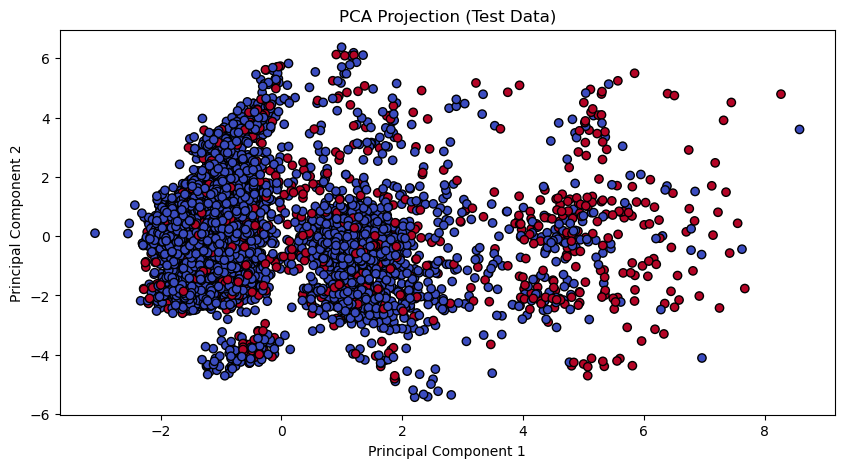

In [61]:
# Visualize PCA results (2D projection)
plt.figure(figsize=(10, 5))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title('PCA Projection (Test Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [67]:
# Grid Search for Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, n_jobs=-1)
grid_search_logreg.fit(X_train_resampled, y_train_resampled)
print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
logreg_best = grid_search_logreg.best_estimator_

# Grid Search for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train_resampled, y_train_resampled)
print("Best parameters for KNN:", grid_search_knn.best_params_)
knn_best = grid_search_knn.best_estimator_


Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}


In [68]:
# Cross-validation for Logistic Regression
cross_val_logreg = cross_val_score(logreg_best, X, y, cv=5)
print("Logistic Regression Cross-Validation Scores:", cross_val_logreg)
print("Logistic Regression Mean CV Score:", cross_val_logreg.mean())

# Cross-validation for KNN
cross_val_knn = cross_val_score(knn_best, X, y, cv=5)
print("KNN Cross-Validation Scores:", cross_val_knn)
print("KNN Mean CV Score:", cross_val_knn.mean())


Logistic Regression Cross-Validation Scores: [0.89505695 0.88099978 0.86927671 0.84771068 0.84693652]
Logistic Regression Mean CV Score: 0.8679961279152814
KNN Cross-Validation Scores: [0.88654208 0.87746074 0.88144216 0.845167   0.83134262]
KNN Mean CV Score: 0.8643909192197137


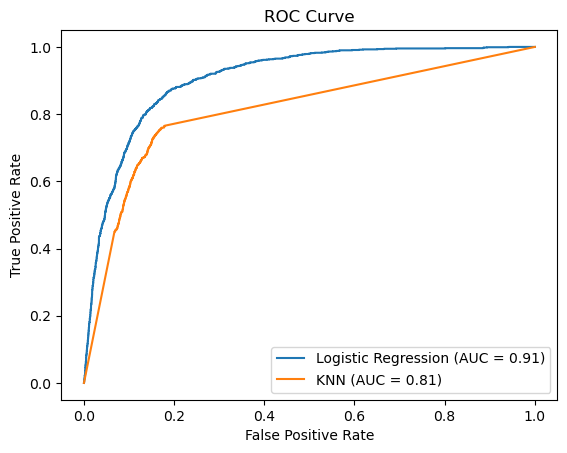

In [69]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_best.predict_proba(X_test_scaled)[:, 1])
auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')

# ROC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_best.predict_proba(X_test_scaled)[:, 1])
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Sammanfatning: De bästa parametrarna för Logistic Regression är {'C': 0.01, 'solver': 'liblinear'}. Vid användning av dessa parametrar uppnåddes följande korsvalideringsresultat: [0.895, 0.881, 0.869, 0.848, 0.847], med ett genomsnittligt korsvalideringsresultat på 0.868.

För KNN är de bästa parametrarna {'n_neighbors': 3, 'weights': 'distance'}. De korsvalideringsresultaten för KNN var: [0.887, 0.877, 0.881, 0.845, 0.831], med ett genomsnittligt korsvalideringsresultat på 0.864.

Logistic Regression uppvisar något högre genomsnittlig korsvalideringspoäng jämfört med KNN, vilket indikerar en något bättre prestanda för denna modell i det aktuella fallet.

1-EDA:

Datasetet utforskas genom att visa en översikt och distributioner för kategoriska variabler som job, education, och housing loan.

2-Datapreparation:

Kategoriska variabler omvandlas till dummy-variabler och datan delas upp i träning och testuppsättningar.
StandardScaler används för att normalisera numeriska data.
SMOTE används för att hantera klassobalans genom att syntetiskt öka minoritetsklassen.

3-Supervised Learning:

Modeller för Logistisk regression och KNN byggs och utvärderas på den ursprungliga datan.
Resultaten rapporteras i form av noggrannhet och klassificeringsrapporter.

4-PCA (Principal Component Analysis):

PCA används för att minska dimensionerna till 2 komponenter, vilket gör datan enklare att visualisera.
Modellerna för Logistisk regression och KNN tränas och utvärderas igen med den PCA-reducerade datan.

5-Visualisering:

PCA-resultaten visualiseras i en 2D-projektion för att ge en bättre bild av datafördelningen.

Presentation och syfte:
Syfte: Förutsäga om en kund prenumererar på en bankprodukt (termininsättning).
För en databerättelse, börja med att förklara datasetets syfte, t.ex. att förutsäga om en kund prenumererar på en banktjänst. Fortsätt med att visa EDA, diskutera de viktigaste variablerna och deras samband med målet (prenumeration). Presentera därefter maskininlärningsresultaten och jämförelser mellan de olika modellerna (med och utan PCA).